In [2]:
from numpy import loadtxt
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
import pandas as pd
import os
import seaborn as sns

In [3]:
# Import saved reasults for plotting

# Load reasults
zero = np.load("./reasults/RF_experement_reasults_0.npy")
one = np.load("./reasults/RF_experement_reasults_1.npy")
two = np.load("./reasults/RF_experement_reasults_2.npy")
three = np.load("./reasults/RF_experement_reasults_3.npy")
four = np.load("./reasults/RF_experement_reasults_0.npy")

accs = np.mean(np.array([zero,one,two,three,four]),axis = 0)*100
stds = np.std(np.array([zero,one,two,three,four]),axis = 0)*100

stds.shape

(3, 6)

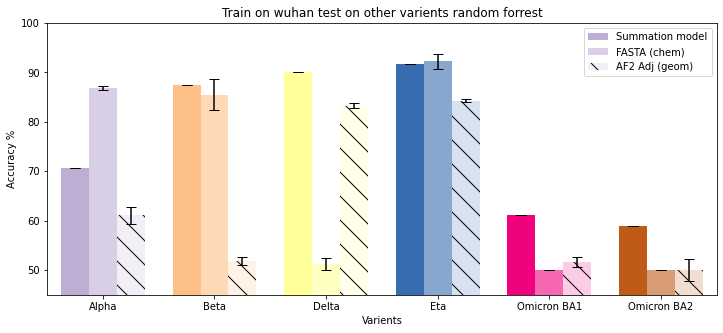

In [29]:

# Process to vectors

colors = cm.get_cmap('Accent')
fig = plt.figure(figsize=(12, 5))
# create data
width = 0.3
x = np.arange(6)*1.2

alpha = 0.9
# plot data in grouped manner of bar type

FASTA = accs[0,:]
ADJ = accs[1,:]
baseline_accs = accs[2,:]

FASTA_err = stds[0,:]
ADJ_err = stds[1,:]
baseline_err = stds[2,:]


for i in range(6):
    plt.bar(x[i]-0.3, np.array(baseline_accs)[i], width,yerr=baseline_err[i],ecolor='black', capsize=5, color=colors(i+1),alpha=1)
    plt.bar(x[i], np.array(FASTA)[i], width, yerr=FASTA_err[i],ecolor='black', capsize=5, color=colors(i+1),alpha=0.6)
    plt.bar(x[i]+0.3,np.array(ADJ)[i], width,yerr=ADJ_err[i], color=colors(i+1),ecolor='black', capsize=5,alpha=0.2,hatch="\\")

plt.xticks(x,['Alpha', 'Beta', 'Delta', 'Eta','Omicron BA1','Omicron BA2'])
plt.xlabel("Varients")
plt.ylabel("Accuracy %")
plt.ylim(45,100)

plt.legend(["Summation model","FASTA (chem)","AF2 Adj (geom)"])
# plt.hlines(50,-0.6,6.6, color='black')
plt.xlim(-0.6,6.6)

plt.title("Train on wuhan test on other varients random forrest")
fig.savefig("../reasults_figs/wuhan_gen.png",bbox_inches='tight',facecolor="white")
#this indicates how knowledge of wuhan environemnt in the ACE2 bidning landscape transferes to other varient clusters.. 
# boil down to real meaning...  
# plot wityh colors ofvarients in the umap space figure... and shadings for the different types.
# have with colors of varients and differnet shading type of the reasult to go next to the space..?  